# Section 1 | Import Libraries and Load Data

In [1]:
# Data processing
import pandas as pd
import numpy as np
import scipy.stats

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Similarity and split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("data/Tempat-Wisata-Toba-Preprocessing.csv")

In [3]:
data.shape

(43226, 9)

In [4]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'address', 'PlaceID',
       'Nama_tempat_wisata', 'Category', 'ReviewerId', 'Rating', 'Reviews'],
      dtype='object')

In [5]:
data = data.rename(columns={'ReviewerId': 'user_id', 'PlaceID': 'item_id', 'Rating': 'rating'})
data['rating'] = data['rating'].astype(float)
data.dropna(inplace=True)
data.head(5)

,Unnamed: 0.1,Unnamed: 0,address,item_id,Nama_tempat_wisata,Category,user_id,rating,Reviews
1,1,1,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.119090e+20,5.0,bagus
3,3,3,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.130720e+20,5.0,sangat menyenagkan
4,4,4,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.061730e+20,5.0,bebas foto dimana aja cuma 2k
6,6,6,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.142390e+20,5.0,amazing pengen kesini lagi
8,8,8,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.047430e+20,3.0,jalan menuju lokasi perlu diperhatikan oleh pe...


In [6]:
data.shape

(22166, 9)

# Section 2 | Data Splitting

In [7]:
# Step 1: Split into 85% training+validation and 15% test
train_val_data, test_data = train_test_split(data, test_size=0.15, random_state=42)
# Step 2: Define validation size as 17% of train+validation, rounded up
val_size = int(len(train_val_data) * 0.17) + 1
# Step 3: Split 85% data into training (about 70% of original) and validation (about 15% of original)
train_data, val_data = train_test_split(train_val_data, test_size=val_size, random_state=42)
# Check sizes
print(f"Train data size: {train_data.shape}")
print(f"Validation data size: {val_data.shape}")
print(f"Test data size: {test_data.shape}")

Train data size: (15638, 9)
Validation data size: (3203, 9)
Test data size: (3325, 9)


# Section 3 | Create User-Item Matrix

In [8]:
def create_user_item_matrix(data, user_col='user_id', item_col='Nama_tempat_wisata', rating_col='rating'):
    data = data.groupby([user_col, item_col])[rating_col].mean().reset_index()
    return data.pivot(index=user_col, columns=item_col, values=rating_col).fillna(0)

# Apply the function to create matrices for each split
train_matrix = create_user_item_matrix(train_data)
val_matrix = create_user_item_matrix(val_data).reindex(columns=train_matrix.columns, fill_value=0)
test_matrix = create_user_item_matrix(test_data).reindex(columns=train_matrix.columns, fill_value=0)

In [9]:
train_matrix

Nama_tempat_wisata,Aek Rangat Pangururan,Aek Sipangolu Bakkara,Air Terjun Efrata,Air Terjun Janji,Air Terjun Pandumaan,Air Terjun Sampuran,Air Terjun Siboruon,Air Terjun Situmurun,Air Terjun Taman Eden 100,Air Terjun Tombak Pangaribuan,...,Tao Silalahi Hotel,Tarabunga,Tempat Pengasingan Soekarno,The Kaldera,Tombak Sulusulu,Tugu D.I PANJAITAN,Tugu Toga Aritonang,WF Coffee&Resto,Wisata Bukit Gibeon,Wisata Rumah Pohon
user_id,,,,,,,,,,,,,,,,,,,,,
1.000030e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000040e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000090e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000100e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000120e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.184390e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.184410e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.184430e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Define RMSE, MAE, MAP, Precision, & Recall Calculation Function 

In [10]:
def compute_rmse(true_matrix, approx_matrix):
    return np.sqrt(mean_squared_error(true_matrix.ravel(), approx_matrix.ravel()))

In [11]:
def compute_map(true_matrix, pred_matrix, threshold=3):
    map_score = 0
    n_users = true_matrix.shape[0]
    
    for user_idx in range(n_users):
        true_ratings = true_matrix[user_idx] >= threshold  # Relevant items based on threshold
        pred_ratings = pred_matrix[user_idx]
        
        # Sort items by predicted rating (descending)
        sorted_items = np.argsort(pred_ratings)[::-1]
        
        # Precision at each relevant item
        precision_at_k = []
        relevant_items = 0
        for i, item_idx in enumerate(sorted_items):
            if true_ratings[item_idx]:
                relevant_items += 1
                precision_at_k.append(relevant_items / (i + 1))
        
        if precision_at_k:
            map_score += np.mean(precision_at_k)
    
    return map_score / n_users

In [12]:
def compute_precision_all_users(true_matrix, pred_matrix, threshold=3):
    precision_all_users = 0
    n_users = true_matrix.shape[0]
    
    for user_idx in range(n_users):
        true_ratings = true_matrix[user_idx] >= threshold  # Relevant items based on threshold
        pred_ratings = pred_matrix[user_idx] >= threshold  # Predicted items based on threshold
        
        # Compute Precision: the proportion of relevant items among predicted items
        relevant_predicted = np.sum(true_ratings & pred_ratings)  # True positives
        predicted_items = np.sum(pred_ratings)  # Total predicted items
        
        if predicted_items > 0:
            precision_all_users += relevant_predicted / predicted_items
        else:
            precision_all_users += 0
    
    return precision_all_users / n_users

In [13]:
def compute_recall_all_users(true_matrix, pred_matrix, threshold=3):
    recall_all_users = 0
    n_users = true_matrix.shape[0]
    
    for user_idx in range(n_users):
        true_ratings = true_matrix[user_idx] >= threshold  # Relevant items based on threshold
        pred_ratings = pred_matrix[user_idx] >= threshold  # Predicted items based on threshold
        
        # Compute Recall: the proportion of relevant items that are predicted
        relevant_predicted = np.sum(true_ratings & pred_ratings)  # True positives
        total_relevant_items = np.sum(true_ratings)  # Total relevant items
        
        if total_relevant_items > 0:
            recall_all_users += relevant_predicted / total_relevant_items
        else:
            recall_all_users += 0
    
    return recall_all_users / n_users

In [14]:
from sklearn.metrics import mean_absolute_error

def compute_mae(true_matrix, approx_matrix):
    return mean_absolute_error(true_matrix.ravel(), approx_matrix.ravel())

# SVD

## No Tuning

In [15]:
from sklearn.decomposition import TruncatedSVD

In [16]:
n_factors = 10
svd = TruncatedSVD(n_components=n_factors, random_state=42)
U_train = svd.fit_transform(train_matrix)
Sigma = svd.components_

train_svd = svd.fit_transform(train_matrix)
train_approx_matrix = svd.inverse_transform(train_svd)

In [17]:
test_svd = svd.transform(test_matrix)
test_approx_matrix = svd.inverse_transform(test_svd)
test_rmse = compute_rmse(test_matrix.values, test_approx_matrix)
test_mae = compute_mae(test_matrix.values, test_approx_matrix)
test_map = compute_map(test_matrix.values, test_approx_matrix)
test_precision = compute_precision_all_users(test_matrix.values, test_approx_matrix)
test_recall = compute_recall_all_users(test_matrix.values, test_approx_matrix)

In [18]:
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Test RMSE: 0.3965
Test MAE: 0.0765


In [19]:
print(f"Test MAP: {test_map:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

Test MAP: 0.4693
Test Precision: 0.3393
Test Recall: 0.3079


## With Tuning

In [20]:
train_errors = {"factors": [], "rmse": [], "mae": [], "map": [], "precision": [], "recall": []}
val_errors = {"factors": [], "rmse": [], "mae": [], "map": [], "precision": [], "recall": []}

factors_range = range(5, 50, 5)  # Test different numbers of latent factors from 5 to 50

for n_factors in factors_range:
    svd = TruncatedSVD(n_components=n_factors, random_state=42)
    
    # Training
    train_svd = svd.fit_transform(train_matrix)
    train_approx_matrix = svd.inverse_transform(train_svd)
    train_rmse = compute_rmse(train_matrix.values, train_approx_matrix)
    train_mae = compute_mae(train_matrix.values, train_approx_matrix)
    train_map = compute_map(train_matrix.values, train_approx_matrix)
    train_precision = compute_precision_all_users(train_matrix.values, train_approx_matrix)
    train_recall = compute_recall_all_users(train_matrix.values, train_approx_matrix)
    
    # Simpan hasil training
    train_errors["factors"].append(n_factors)
    train_errors["rmse"].append(train_rmse)
    train_errors["mae"].append(train_mae)
    train_errors["map"].append(train_map)
    train_errors["precision"].append(train_precision)
    train_errors["recall"].append(train_recall)
    
    # Validation
    val_svd = svd.transform(val_matrix)
    val_approx_matrix = svd.inverse_transform(val_svd)
    val_rmse = compute_rmse(val_matrix.values, val_approx_matrix)
    val_mae = compute_mae(val_matrix.values, val_approx_matrix)
    val_map = compute_map(val_matrix.values, val_approx_matrix)
    val_precision = compute_precision_all_users(val_matrix.values, val_approx_matrix)
    val_recall = compute_recall_all_users(val_matrix.values, val_approx_matrix)
    
    # Simpan hasil validasi
    val_errors["factors"].append(n_factors)
    val_errors["rmse"].append(val_rmse)
    val_errors["mae"].append(val_mae)
    val_errors["map"].append(val_map)
    val_errors["precision"].append(val_precision)
    val_errors["recall"].append(val_recall)

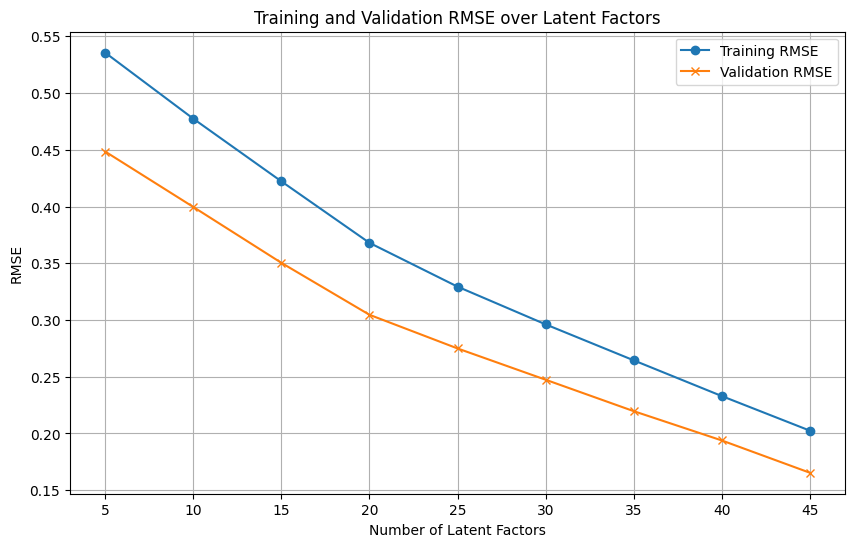

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(factors_range, train_errors["rmse"], label="Training RMSE", marker='o')
plt.plot(factors_range, val_errors["rmse"], label="Validation RMSE", marker='x')
plt.xlabel("Number of Latent Factors")
plt.ylabel("RMSE")
plt.legend()
plt.title("Training and Validation RMSE over Latent Factors")
plt.grid()
plt.show()

In [22]:
optimal_idx = val_errors["rmse"].index(min(val_errors["rmse"]))
optimal_factors = factors_range[optimal_idx]
print(f"Optimal Number of Factors: {optimal_factors}")

Optimal Number of Factors: 45


In [23]:
svd = TruncatedSVD(n_components=optimal_factors, random_state=42)
train_svd = svd.fit_transform(train_matrix)
train_approx_matrix = svd.inverse_transform(train_svd)

In [ ]:
test_svd = svd.transform(test_matrix)
test_approx_matrix = svd.inverse_transform(test_svd)
final_test_rmse = compute_rmse(test_matrix.values, test_approx_matrix)
final_test_mae = compute_mae(test_matrix.values, test_approx_matrix)
final_test_map = compute_map(test_matrix.values, test_approx_matrix)

final_test_precision = compute_precision_all_users(test_matrix.values, test_approx_matrix)
final_test_recall = compute_recall_all_users(test_matrix.values, test_approx_matrix)

## Comparison between no tuning & tuning SVD

In [67]:
metrics = ["RMSE", "MAE", "MAP", "Precision", "Recall"]
before_tuning = [test_rmse, test_mae, test_map, test_precision, test_recall]
after_tuning = [final_test_rmse, final_test_mae, final_test_map, final_test_precision, final_test_recall]

In [69]:
comparison_df = pd.DataFrame({
    "Metric" : metrics, 
    "Before Tuning" : before_tuning,
    "After Tuning" : after_tuning
})

<Axes: xlabel='Metric', ylabel='Score'>

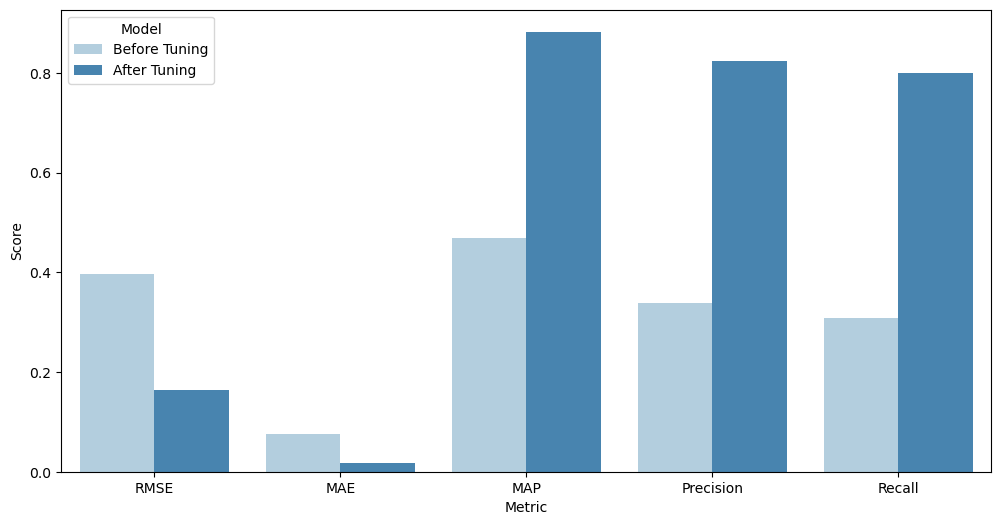

In [71]:
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df.melt(id_vars="Metric", var_name="Model", value_name="Score"),
            x="Metric", y="Score", hue="Model", palette="Blues")

## Recommendation for user SVD

In [74]:
svd = TruncatedSVD(n_components=45, random_state=42)
matrix = svd.fit_transform(train_matrix.fillna(0))

In [76]:
reconstructed_matrix = np.dot(svd.transform(train_matrix.fillna(0)), svd.components_)
reconstructed_df = pd.DataFrame(reconstructed_matrix, index=train_matrix.index, columns=train_matrix.columns)

In [78]:
def recommend_places(user_id, original_df, predicted_df, top_n=3):
    """
    Menampilkan rekomendasi tempat untuk user tertentu.
    """
    # Tempat yang sudah diberi rating oleh user
    user_rated_places = original_df.loc[user_id]
    rated_places = user_rated_places[user_rated_places > 0].index.tolist()

    # Prediksi tempat untuk user
    user_predictions = predicted_df.loc[user_id]

    # Filter tempat yang belum dirating
    recommendations = user_predictions[~user_predictions.index.isin(rated_places)]
    
    # Urutkan berdasarkan prediksi tertinggi
    top_recommendations = recommendations.sort_values(ascending=False).head(top_n)
    
    return top_recommendations.index.tolist()

In [80]:
def print_recommendations(user_id, recommendations):
    """
    Menampilkan rekomendasi tempat dalam format list vertikal.
    """
    print(f"Rekomendasi untuk user {user_id}:")
    for i, place in enumerate(recommendations, start=1):
        print(f"{i}. {place}")

In [82]:
user_id = 1.000030e+20
recommendations = recommend_places(user_id, train_matrix, reconstructed_df, top_n=10)
print_recommendations(user_id, recommendations)

Rekomendasi untuk user 1.00003e+20:
1. Pantai Silalahi
2. Pesanggrahan Bung Karno
3. Kebun Raya Samosir, SUMUT
4. Taman Bunga Sapo Juma
5. Air Terjun Taman Eden 100
6. Patung Sigale gale
7. Bukit Senyum Motung
8. Objek Wisata Budaya Batu Kursi Raja Siallagan
9. Desa Meat
10. BUKIT GIBEON (YAPIM TARUNA)


In [84]:
user_id = 1.000040e+20
recommendations = recommend_places(user_id, train_matrix, reconstructed_df, top_n=10)
print_recommendations(user_id, recommendations)

Rekomendasi untuk user 1.00004e+20:
1. Bukit Burung
2. Pantai Silalahi
3. Kebun Raya Samosir, SUMUT
4. Bukit Holbung
5. Tombak Sulusulu
6. Caldera toba nomadic escape (glamour camping)
7. Taman Bunga Sapo Juma
8. Singgolom
9. Monumen Raja SONAKMALELA
10. Siregar Aek Nalas


# ALS

## No Tuning

In [88]:
from numpy.linalg import solve

In [90]:
def als_train(ratings_matrix, n_factors=20, n_iterations=10, lambda_reg=0.1):
    # Initialize random P (user factors) and Q (item factors)
    n_users, n_items = ratings_matrix.shape
    P = np.random.rand(n_users, n_factors)
    Q = np.random.rand(n_items, n_factors)

    for iteration in range(n_iterations):
        # Fix Q and solve for P
        for u in range(n_users):
            # Select items rated by user u
            rated_items = ratings_matrix[u, :] > 0
            Q_rated = Q[rated_items]
            R_u = ratings_matrix[u, rated_items]
            
            # Solve for P[u]
            A = Q_rated.T @ Q_rated + lambda_reg * np.eye(n_factors)
            b = Q_rated.T @ R_u
            P[u] = solve(A, b)
        
        # Fix P and solve for Q
        for i in range(n_items):
            # Select users who rated item i
            rated_users = ratings_matrix[:, i] > 0
            P_rated = P[rated_users]
            R_i = ratings_matrix[rated_users, i]
            
            # Solve for Q[i]
            A = P_rated.T @ P_rated + lambda_reg * np.eye(n_factors)
            b = P_rated.T @ R_i
            Q[i] = solve(A, b)

        # Compute reconstruction error
        reconstruction = P @ Q.T
        error = np.sum((ratings_matrix[ratings_matrix > 0] - reconstruction[ratings_matrix > 0])**2)
        print(f"Iteration {iteration + 1}/{n_iterations}, Error: {error:.4f}")

    return P, Q

In [92]:
P_als_train, Q_als_train = als_train(train_matrix.values, n_factors=20, n_iterations=10, lambda_reg=0.1)

Iteration 1/10, Error: 4.2274
Iteration 2/10, Error: 2.4459
Iteration 3/10, Error: 1.7662
Iteration 4/10, Error: 1.4022
Iteration 5/10, Error: 1.1772
Iteration 6/10, Error: 1.0262
Iteration 7/10, Error: 0.9188
Iteration 8/10, Error: 0.8393
Iteration 9/10, Error: 0.7785
Iteration 10/10, Error: 0.7304


In [94]:
P_als_test, Q_als_test = als_train(test_matrix.values, n_factors=20, n_iterations=10, lambda_reg=0.1)

Iteration 1/10, Error: 0.4364
Iteration 2/10, Error: 0.4272
Iteration 3/10, Error: 0.4189
Iteration 4/10, Error: 0.4124
Iteration 5/10, Error: 0.4074
Iteration 6/10, Error: 0.4037
Iteration 7/10, Error: 0.4013
Iteration 8/10, Error: 0.4000
Iteration 9/10, Error: 0.3997
Iteration 10/10, Error: 0.4006


In [96]:
als_reconstruction_test = P_als_test @ Q_als_test.T

In [98]:
test_rmse = compute_rmse(test_matrix.values, als_reconstruction_test)
test_mae = compute_mae(test_matrix.values, als_reconstruction_test)
test_map = compute_map(test_matrix.values, als_reconstruction_test)
test_precision = compute_precision_all_users(test_matrix.values, als_reconstruction_test)
test_recall = compute_recall_all_users(test_matrix.values, als_reconstruction_test)

In [100]:
print("ALS Model Evaluation Results:")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MAP: {test_map:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

ALS Model Evaluation Results:
Test RMSE: 2.9724
Test MAE: 2.8126
Test MAP: 0.8849
Test Precision: 0.0409
Test Recall: 0.8998


## Tuning

In [103]:
for n_factors in factors_range:
    # Training ALS
    P_train, Q_train = als_train(train_matrix.values, n_factors=n_factors, n_iterations=10, lambda_reg=0.1)
    train_reconstruction = P_train @ Q_train.T
    
    train_rmse = compute_rmse(train_matrix.values, train_reconstruction)
    train_mae = compute_mae(train_matrix.values, train_reconstruction)
    train_map = compute_map(train_matrix.values, train_reconstruction)
    train_precision = compute_precision_all_users(train_matrix.values, train_reconstruction)
    train_recall = compute_recall_all_users(train_matrix.values, train_reconstruction)

    train_errors["factors"].append(n_factors)
    train_errors["rmse"].append(train_rmse)
    train_errors["mae"].append(train_mae)
    train_errors["map"].append(train_map)
    train_errors["precision"].append(train_precision)
    train_errors["recall"].append(train_recall)

    # Validation ALS
    P_val, Q_val = als_train(val_matrix.values, n_factors=n_factors, n_iterations=10, lambda_reg=0.1)
    val_reconstruction = P_val @ Q_val.T
    
    val_rmse = compute_rmse(val_matrix.values, val_reconstruction)
    val_mae = compute_mae(val_matrix.values, val_reconstruction)
    val_map = compute_map(val_matrix.values, val_reconstruction)
    val_precision = compute_precision_all_users(val_matrix.values, val_reconstruction)
    val_recall = compute_recall_all_users(val_matrix.values, val_reconstruction)

    val_errors["factors"].append(n_factors)
    val_errors["rmse"].append(val_rmse)
    val_errors["mae"].append(val_mae)
    val_errors["map"].append(val_map)
    val_errors["precision"].append(val_precision)
    val_errors["recall"].append(val_recall)

Iteration 1/10, Error: 1028.6731
Iteration 2/10, Error: 629.1417
Iteration 3/10, Error: 458.8578
Iteration 4/10, Error: 362.8481
Iteration 5/10, Error: 301.8848
Iteration 6/10, Error: 259.6604
Iteration 7/10, Error: 228.9280
Iteration 8/10, Error: 206.5013
Iteration 9/10, Error: 189.6189
Iteration 10/10, Error: 176.3978
Iteration 1/10, Error: 32.4577
Iteration 2/10, Error: 6.3045
Iteration 3/10, Error: 3.5114
Iteration 4/10, Error: 2.4378
Iteration 5/10, Error: 1.8591
Iteration 6/10, Error: 1.4987
Iteration 7/10, Error: 1.2546
Iteration 8/10, Error: 1.0797
Iteration 9/10, Error: 0.9492
Iteration 10/10, Error: 0.8489
Iteration 1/10, Error: 131.4234
Iteration 2/10, Error: 60.3842
Iteration 3/10, Error: 37.4524
Iteration 4/10, Error: 26.2986
Iteration 5/10, Error: 19.9236
Iteration 6/10, Error: 15.9127
Iteration 7/10, Error: 13.1885
Iteration 8/10, Error: 11.2171
Iteration 9/10, Error: 9.7216
Iteration 10/10, Error: 8.5517
Iteration 1/10, Error: 0.8997
Iteration 2/10, Error: 0.4582
Iterat

In [105]:
P_als_test, Q_als_test = als_train(test_matrix.values, n_factors=10, n_iterations=10, lambda_reg=0.1)

Iteration 1/10, Error: 0.9798
Iteration 2/10, Error: 0.4518
Iteration 3/10, Error: 0.3739
Iteration 4/10, Error: 0.3315
Iteration 5/10, Error: 0.3071
Iteration 6/10, Error: 0.2930
Iteration 7/10, Error: 0.2849
Iteration 8/10, Error: 0.2807
Iteration 9/10, Error: 0.2794
Iteration 10/10, Error: 0.2800


In [107]:
als_reconstruction_test = P_als_test @ Q_als_test.T

In [109]:
test_rmse = compute_rmse(test_matrix.values, als_reconstruction_test)
test_mae = compute_mae(test_matrix.values, als_reconstruction_test)
test_map = compute_map(test_matrix.values, als_reconstruction_test)
test_precision = compute_precision_all_users(test_matrix.values, als_reconstruction_test)
test_recall = compute_recall_all_users(test_matrix.values, als_reconstruction_test)

In [111]:
print("ALS Model Evaluation Results:")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MAP: {test_map:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

ALS Model Evaluation Results:
Test RMSE: 2.6739
Test MAE: 2.4511
Test MAP: 0.8380
Test Precision: 0.0509
Test Recall: 0.8995


In [113]:
iterations_range = [5, 10, 20, 30]
lambda_range = [0.01, 0.05, 0.1, 0.5, 1.0]

In [115]:
best_rmse = float('inf')
best_n_iterations = None
best_lambda_reg = None

In [117]:
hyperparameter_errors = {
    "iterations": [],
    "lambda_reg": [],
    "rmse": [],
    "mae": [],
    "map": [],
    "precision": [],
    "recall": []
}

In [119]:
for n_iter in iterations_range:
    for lambda_val in lambda_range:
        # Training ALS dengan kombinasi hyperparameter
        P_train, Q_train = als_train(train_matrix.values, n_factors=10, n_iterations=n_iter, lambda_reg=lambda_val)
        train_reconstruction = P_train @ Q_train.T
        
        train_rmse = compute_rmse(train_matrix.values, train_reconstruction)
        train_mae = compute_mae(train_matrix.values, train_reconstruction)
        train_map = compute_map(train_matrix.values, train_reconstruction)
        train_precision = compute_precision_all_users(train_matrix.values, train_reconstruction)
        train_recall = compute_recall_all_users(train_matrix.values, train_reconstruction)

        # Simpan hasil
        hyperparameter_errors["iterations"].append(n_iter)
        hyperparameter_errors["lambda_reg"].append(lambda_val)
        hyperparameter_errors["rmse"].append(train_rmse)
        hyperparameter_errors["mae"].append(train_mae)
        hyperparameter_errors["map"].append(train_map)
        hyperparameter_errors["precision"].append(train_precision)
        hyperparameter_errors["recall"].append(train_recall)

        # Simpan parameter terbaik berdasarkan RMSE
        if train_rmse < best_rmse:
            best_rmse = train_rmse
            best_n_iterations = n_iter
            best_lambda_reg = lambda_val

Iteration 1/5, Error: 50.5542
Iteration 2/5, Error: 26.9224
Iteration 3/5, Error: 12.9065
Iteration 4/5, Error: 7.2521
Iteration 5/5, Error: 4.8853
Iteration 1/5, Error: 107.2557
Iteration 2/5, Error: 49.8495
Iteration 3/5, Error: 28.3053
Iteration 4/5, Error: 18.1379
Iteration 5/5, Error: 12.8648
Iteration 1/5, Error: 143.9434
Iteration 2/5, Error: 63.3061
Iteration 3/5, Error: 40.4552
Iteration 4/5, Error: 28.6760
Iteration 5/5, Error: 21.5940
Iteration 1/5, Error: 508.5896
Iteration 2/5, Error: 183.1806
Iteration 3/5, Error: 119.7662
Iteration 4/5, Error: 89.1952
Iteration 5/5, Error: 71.1896
Iteration 1/5, Error: 868.8180
Iteration 2/5, Error: 285.5607
Iteration 3/5, Error: 198.8221
Iteration 4/5, Error: 155.4841
Iteration 5/5, Error: 130.1234
Iteration 1/10, Error: 46.6164
Iteration 2/10, Error: 12.2308
Iteration 3/10, Error: 6.6797
Iteration 4/10, Error: 4.7177
Iteration 5/10, Error: 3.7485
Iteration 6/10, Error: 3.1317
Iteration 7/10, Error: 2.6883
Iteration 8/10, Error: 2.3493


In [121]:
print(f"Best n_iterations: {best_n_iterations}")
print(f"Best lambda_reg: {best_lambda_reg}")
print(f"Best RMSE: {best_rmse:.4f}")

Best n_iterations: 30
Best lambda_reg: 0.5
Best RMSE: 1.9731


In [123]:
P_als_test, Q_als_test = als_train(test_matrix.values, n_factors=10, n_iterations=30, lambda_reg=0.5)

Iteration 1/30, Error: 15.9210
Iteration 2/30, Error: 8.1938
Iteration 3/30, Error: 8.1800
Iteration 4/30, Error: 8.6482
Iteration 5/30, Error: 9.2575
Iteration 6/30, Error: 9.9033
Iteration 7/30, Error: 10.5388
Iteration 8/30, Error: 11.1405
Iteration 9/30, Error: 11.7093
Iteration 10/30, Error: 12.2540
Iteration 11/30, Error: 12.7747
Iteration 12/30, Error: 13.2703
Iteration 13/30, Error: 13.7411
Iteration 14/30, Error: 14.1878
Iteration 15/30, Error: 14.6114
Iteration 16/30, Error: 15.0130
Iteration 17/30, Error: 15.3937
Iteration 18/30, Error: 15.7546
Iteration 19/30, Error: 16.0971
Iteration 20/30, Error: 16.4227
Iteration 21/30, Error: 16.7327
Iteration 22/30, Error: 17.0285
Iteration 23/30, Error: 17.3112
Iteration 24/30, Error: 17.5817
Iteration 25/30, Error: 17.8407
Iteration 26/30, Error: 18.0888
Iteration 27/30, Error: 18.3265
Iteration 28/30, Error: 18.5543
Iteration 29/30, Error: 18.7724
Iteration 30/30, Error: 18.9813


In [125]:
als_reconstruction_test = P_als_test @ Q_als_test.T

In [127]:
final_test_rmse = compute_rmse(test_matrix.values, als_reconstruction_test)
final_test_mae = compute_mae(test_matrix.values, als_reconstruction_test)
final_test_map = compute_map(test_matrix.values, als_reconstruction_test)
final_test_precision = compute_precision_all_users(test_matrix.values, als_reconstruction_test)
final_test_recall = compute_recall_all_users(test_matrix.values, als_reconstruction_test)

In [129]:
print("ALS Model Evaluation Results:")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MAP: {test_map:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

ALS Model Evaluation Results:
Test RMSE: 2.6739
Test MAE: 2.4511
Test MAP: 0.8380
Test Precision: 0.0509
Test Recall: 0.8995


## Comparison between no tuning & tuning ALS

In [132]:
metrics = ["RMSE", "MAE", "MAP", "Precision", "Recall"]
before_tuning = [test_rmse, test_mae, test_map, test_precision, test_recall]
after_tuning = [final_test_rmse, final_test_mae, final_test_map, final_test_precision, final_test_recall]

In [134]:
comparison_df = pd.DataFrame({
    "Metric" : metrics, 
    "Before Tuning" : before_tuning,
    "After Tuning" : after_tuning
})

<Axes: xlabel='Metric', ylabel='Score'>

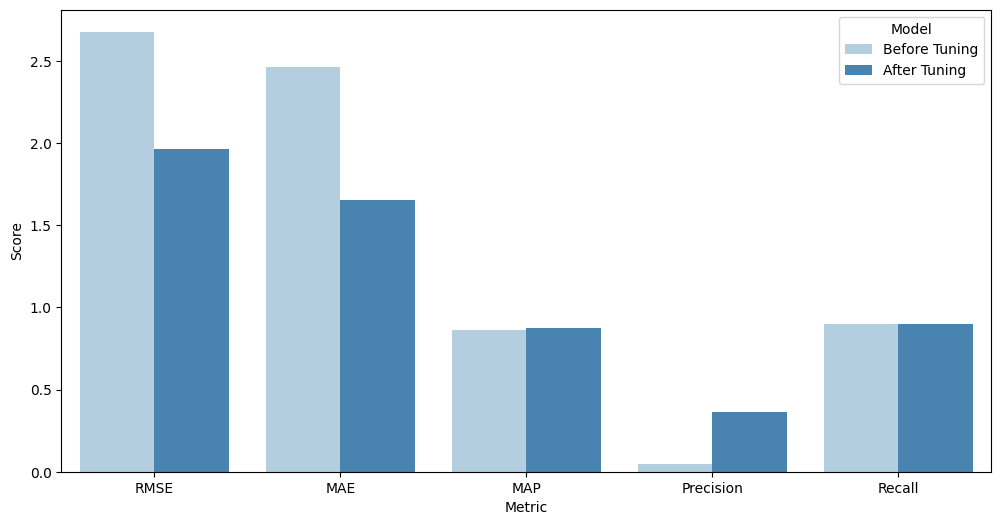

In [57]:
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df.melt(id_vars="Metric", var_name="Model", value_name="Score"),
            x="Metric", y="Score", hue="Model", palette="Blues")

# BERT

In [136]:
import torch
from transformers import BertTokenizer, BertModel
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [138]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

In [140]:
# Function to encode text using BERT and get embeddings
def get_bert_embeddings(texts):
    encoded_input = tokenizer(texts.tolist(), padding=True, truncation=True, return_tensors='pt', max_length=512)
    with torch.no_grad():
        output = bert_model(**encoded_input)
    embeddings = output.last_hidden_state.mean(dim=1).numpy()  # Average pooling of token embeddings
    return embeddings

In [142]:
# Step 1: Preprocess reviews and create embeddings for each 'item_id' (place)
reviews_grouped = data.groupby('item_id')['Reviews'].apply(lambda x: ' '.join(x)).reset_index()
item_embeddings = get_bert_embeddings(reviews_grouped['Reviews'])

In [144]:
# Step 2: Calculate similarity between items using cosine similarity
cosine_sim = cosine_similarity(item_embeddings)

# Adjust cosine_sim size if needed to match train_matrix columns
if cosine_sim.shape[0] != train_matrix.shape[1]:
    print("Adjusting cosine_sim size to match train_matrix columns.")
    cosine_sim = cosine_sim[:train_matrix.shape[1], :train_matrix.shape[1]]

Adjusting cosine_sim size to match train_matrix columns.


In [146]:
# Step 3: Create predicted ratings matrix (using top N similar items for prediction)
def predict_ratings(user_item_matrix, sim_matrix, top_n=10):
    n_users = user_item_matrix.shape[0]
    n_items = user_item_matrix.shape[1]
    
    pred_matrix = np.zeros_like(user_item_matrix, dtype=float)
    
    for user_idx in range(n_users):
        for item_idx in range(n_items):
            if user_item_matrix[user_idx, item_idx] == 0:  # If no rating given by user
                sim_scores = sim_matrix[item_idx]  # Get similarity scores of the current item with all items
                
                # Get indices of top 10 similar items (fixed)
                sorted_sim_indices = np.argsort(sim_scores)[::-1][:top_n]
                
                # Calculate predicted rating as weighted average of ratings from similar items
                similar_ratings = user_item_matrix[user_idx, sorted_sim_indices]
                weights = sim_scores[sorted_sim_indices]
                
                # Avoid division by zero
                if np.sum(weights) > 0:
                    pred_rating = np.dot(similar_ratings, weights) / np.sum(weights)
                else:
                    pred_rating = 0
                
                pred_matrix[user_idx, item_idx] = pred_rating
    
    return pred_matrix

# Ensure test_matrix and train_matrix have consistent dimensions
if train_matrix.columns.tolist() != test_matrix.columns.tolist():
    print("Aligning test_matrix columns with train_matrix.")
    test_matrix = test_matrix.reindex(columns=train_matrix.columns, fill_value=0)

In [148]:
# Evaluate model
evaluation_results = {}

try:
    # Predict ratings using cosine similarity
    predicted_matrix = predict_ratings(train_matrix.values, cosine_sim)

    # Debug: Check dimensions
    print(f"Ukuran train_matrix: {train_matrix.shape}")
    print(f"Ukuran test_matrix: {test_matrix.shape}")
    print(f"Ukuran predicted_matrix (sebelum penyelarasan): {predicted_matrix.shape}")

    # Align predicted_matrix with test_matrix users using index positions
    test_user_indices = test_matrix.index
    train_user_indices = train_matrix.index

    # Find matching users in train_matrix and test_matrix
    matched_user_indices = test_user_indices.intersection(train_user_indices)
    matched_positions = [train_user_indices.get_loc(idx) for idx in matched_user_indices]

    # Filter matched predictions
    predicted_matrix_filtered = predicted_matrix[matched_positions]

    # Handle unmatched users by filling with global mean
    unmatched_user_count = len(test_user_indices) - len(matched_positions)
    global_mean = train_matrix.values[train_matrix.values > 0].mean()
    predicted_matrix_unmatched = np.full((unmatched_user_count, test_matrix.shape[1]), global_mean)

    # Combine matched and unmatched predictions
    predicted_matrix_combined = np.vstack([predicted_matrix_filtered, predicted_matrix_unmatched])

    # Sort to align with test_matrix indices
    combined_indices = list(matched_user_indices) + list(set(test_user_indices) - set(matched_user_indices))
    sorted_indices = np.argsort([test_user_indices.get_loc(idx) for idx in combined_indices])
    predicted_matrix_final = predicted_matrix_combined[sorted_indices]

    # Debug: Check dimensions after alignment
    print(f"Ukuran predicted_matrix (setelah penyelarasan): {predicted_matrix_final.shape}")

    # Extract true values from test_matrix
    test_matrix_values = test_matrix.values

    # Compute evaluation metrics
    test_rmse = np.sqrt(mean_squared_error(test_matrix_values.ravel(), predicted_matrix_final.ravel()))
    test_mae = mean_absolute_error(test_matrix_values.ravel(), predicted_matrix_final.ravel())
    test_map = compute_map(test_matrix_values, predicted_matrix_final)
    test_precision = compute_precision_all_users(test_matrix_values, predicted_matrix_final)
    test_recall = compute_recall_all_users(test_matrix_values, predicted_matrix_final)

    # Save evaluation results
    evaluation_results = {
        "RMSE": test_rmse,
        "MAE": test_mae,
        "MAP": test_map,
        "Precision": test_precision,
        "Recall": test_recall
    }

    # Output evaluation results
    print("\n--- Test Evaluation ---")
    for metric, value in evaluation_results.items():
        print(f"Test {metric}: {value:.4f}")

except ValueError as e:
    print(f"ValueError encountered: {e}")
    print("Ensure all matrices have consistent dimensions and valid values.")

except IndexError as e:
    print(f"IndexError encountered: {e}")
    print("Ensure indexing logic is consistent between train and test matrices.")


Ukuran train_matrix: (8905, 98)
Ukuran test_matrix: (2838, 98)
Ukuran predicted_matrix (sebelum penyelarasan): (8905, 98)
Ukuran predicted_matrix (setelah penyelarasan): (2838, 98)

--- Test Evaluation ---
Test RMSE: 2.7329
Test MAE: 1.7026
Test MAP: 0.0494
Test Precision: 0.0039
Test Recall: 0.3502


## With Tuning

In [151]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
from torch.optim import AdamW
import torch.nn as nn
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [153]:
# Step 1: Load Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [155]:
# Step 2: Custom Dataset
class ReviewDataset(Dataset):
    def __init__(self, reviews, ratings, tokenizer, max_len=128):
        self.reviews = reviews
        self.ratings = ratings
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        review = str(self.reviews[idx])
        rating = self.ratings[idx]
        encoding = self.tokenizer(
            review,
            padding='max_length',
            truncation=True,
            max_length=self.max_len,
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'rating': torch.tensor(rating, dtype=torch.float)
        }

In [157]:
# Step 3: Load Data
# Replace `data` with your actual DataFrame containing 'Reviews' and 'rating'
reviews = data['Reviews']
ratings = data['rating']

In [159]:
# Step 4: Train-Test Split
train_reviews, val_reviews, train_ratings, val_ratings = train_test_split(
    reviews, ratings, test_size=0.2, random_state=42
)
train_reviews = train_reviews.reset_index(drop=True)
val_reviews = val_reviews.reset_index(drop=True)
train_ratings = train_ratings.reset_index(drop=True)
val_ratings = val_ratings.reset_index(drop=True)

In [161]:
# Step 5: Define Model
class BertRegressor(nn.Module):
    def __init__(self, pretrained_model_name, dropout=0.3):
        super(BertRegressor, self).__init__()
        self.bert = BertModel.from_pretrained(pretrained_model_name)
        self.drop = nn.Dropout(dropout)
        self.linear = nn.Linear(self.bert.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        dropped_out = self.drop(pooled_output)
        return self.linear(dropped_out)

In [163]:
# Step 6: Define Training and Evaluation Functions
def train_epoch(model, dataloader, loss_fn, optimizer, device):
    model.train()
    total_loss = 0
    for i, batch in enumerate(dataloader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        ratings = batch['rating'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = loss_fn(outputs.squeeze(-1), ratings)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        if i % 10 == 0:  # Log every 10 batches
            print(f"Batch {i}/{len(dataloader)} - Loss: {loss.item():.4f}")
    return total_loss / len(dataloader)

def eval_model(model, dataloader, loss_fn, device):
    model.eval()
    total_loss = 0
    predictions = []
    true_ratings = []
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            ratings = batch['rating'].to(device)

            outputs = model(input_ids, attention_mask)
            loss = loss_fn(outputs.squeeze(-1), ratings)
            total_loss += loss.item()

            predictions.extend(outputs.squeeze(-1).cpu().numpy())
            true_ratings.extend(ratings.cpu().numpy())
    return total_loss / len(dataloader), predictions, true_ratings

In [165]:
import numpy as np
import torch
from torch.utils.data import DataLoader
from transformers import AdamW
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle

# Step 7: Hyperparameter Tuning
learning_rates = [1e-5, 3e-5]
dropouts = [0.1, 0.3]
max_lengths = [128]

tuning_results = {
    "lr": [], "dropout": [], "max_len": [],
    "train_rmse": [], "train_mae": [], "train_map": [], "train_precision": [], "train_recall": [],
    "val_rmse": [], "val_mae": [], "val_map": [], "val_precision": [], "val_recall": []
}

device = 'cuda' if torch.cuda.is_available() else 'cpu'
BATCH_SIZE = 16
EPOCHS = 1

def compute_map(true_matrix, pred_matrix, threshold=3):
    """Compute Mean Average Precision (MAP) for recommendation."""
    true_matrix = np.array(true_matrix)  # Ensure input is NumPy array
    pred_matrix = np.array(pred_matrix)  # Ensure input is NumPy array

    # Check if the data is 2D. If not, reshape to (n_users, n_items)
    if true_matrix.ndim == 1:
        true_matrix = true_matrix.reshape(-1, 1)
    if pred_matrix.ndim == 1:
        pred_matrix = pred_matrix.reshape(-1, 1)

    map_score = 0
    n_users = true_matrix.shape[0]

    for user_idx in range(n_users):
        true_ratings = true_matrix[user_idx] >= threshold  # Relevant items based on threshold
        pred_ratings = pred_matrix[user_idx]

        # Ensure true_ratings and pred_ratings are arrays
        true_ratings = np.array(true_ratings)
        pred_ratings = np.array(pred_ratings)

        # Sort predictions by descending order
        sorted_indices = np.argsort(pred_ratings)[::-1]
        sorted_true_ratings = true_ratings[sorted_indices]

        # Compute precision at each relevant position
        relevant_indices = np.where(sorted_true_ratings)[0] + 1  # 1-based indexing
        precisions = np.arange(1, len(relevant_indices) + 1) / relevant_indices
        map_score += precisions.mean() if precisions.size > 0 else 0

    return map_score / n_users if n_users > 0 else 0

try:
    for lr in learning_rates:
        for dropout in dropouts:
            for max_len in max_lengths:
                print(f"Tuning: lr={lr}, dropout={dropout}, max_len={max_len}")

                # Create Datasets and DataLoaders
                train_dataset = ReviewDataset(train_reviews, train_ratings, tokenizer, max_len=max_len)
                val_dataset = ReviewDataset(val_reviews, val_ratings, tokenizer, max_len=max_len)
                train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
                val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

                # Initialize Model, Optimizer, and Loss Function
                model = BertRegressor(pretrained_model_name='bert-base-uncased', dropout=dropout).to(device)
                optimizer = AdamW(model.parameters(), lr=lr)
                loss_fn = nn.MSELoss()

                # Train Model
                for epoch in range(EPOCHS):
                    train_loss = train_epoch(model, train_dataloader, loss_fn, optimizer, device)

                # Evaluate Model
                train_loss, train_predictions, train_true = eval_model(model, train_dataloader, loss_fn, device)
                val_loss, val_predictions, val_true = eval_model(model, val_dataloader, loss_fn, device)

                # Convert true and predicted values to 2D NumPy arrays
                train_true = np.array(train_true).reshape(-1, 1) if np.array(train_true).ndim == 1 else np.array(train_true)
                train_predictions = np.array(train_predictions).reshape(-1, 1) if np.array(train_predictions).ndim == 1 else np.array(train_predictions)
                val_true = np.array(val_true).reshape(-1, 1) if np.array(val_true).ndim == 1 else np.array(val_true)
                val_predictions = np.array(val_predictions).reshape(-1, 1) if np.array(val_predictions).ndim == 1 else np.array(val_predictions)

                # Compute Metrics
                train_rmse = np.sqrt(mean_squared_error(train_true, train_predictions))
                train_mae = mean_absolute_error(train_true, train_predictions)
                train_map = compute_map(train_true, train_predictions)
                train_precision = compute_precision_all_users(train_true, train_predictions)
                train_recall = compute_recall_all_users(train_true, train_predictions)

                val_rmse = np.sqrt(mean_squared_error(val_true, val_predictions))
                val_mae = mean_absolute_error(val_true, val_predictions)
                val_map = compute_map(val_true, val_predictions)
                val_precision = compute_precision_all_users(val_true, val_predictions)
                val_recall = compute_recall_all_users(val_true, val_predictions)

                # Store Results
                tuning_results["lr"].append(lr)
                tuning_results["dropout"].append(dropout)
                tuning_results["max_len"].append(max_len)
                tuning_results["train_rmse"].append(train_rmse)
                tuning_results["train_mae"].append(train_mae)
                tuning_results["train_map"].append(train_map)
                tuning_results["train_precision"].append(train_precision)
                tuning_results["train_recall"].append(train_recall)
                tuning_results["val_rmse"].append(val_rmse)
                tuning_results["val_mae"].append(val_mae)
                tuning_results["val_map"].append(val_map)
                tuning_results["val_precision"].append(val_precision)
                tuning_results["val_recall"].append(val_recall)

                # Print Results
                print("\n--- Results ---")
                print(f"Train - RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, MAP: {train_map:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}")
                print(f"Val   - RMSE: {val_rmse:.4f}, MAE: {val_mae:.4f}, MAP: {val_map:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}")

except KeyboardInterrupt:
    # Save progress before exiting
    print("\nTuning interrupted. Saving current progress...")
    with open("tuning_results.pkl", "wb") as f:
        pickle.dump(tuning_results, f)
    print("Progress saved. You can resume later.")


Tuning: lr=1e-05, dropout=0.1, max_len=128


/opt/anaconda3/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Batch 0/1109 - Loss: 33.9746
Batch 10/1109 - Loss: 14.2673
Batch 20/1109 - Loss: 5.8806
Batch 30/1109 - Loss: 6.3249
Batch 40/1109 - Loss: 6.3220
Batch 50/1109 - Loss: 4.8764
Batch 60/1109 - Loss: 4.0777
Batch 70/1109 - Loss: 2.3007
Batch 80/1109 - Loss: 1.4583
Batch 90/1109 - Loss: 1.1615
Batch 100/1109 - Loss: 1.1989
Batch 110/1109 - Loss: 0.5642
Batch 120/1109 - Loss: 1.3180
Batch 130/1109 - Loss: 2.0148
Batch 140/1109 - Loss: 0.5934
Batch 150/1109 - Loss: 0.4320
Batch 160/1109 - Loss: 0.7111
Batch 170/1109 - Loss: 0.4815
Batch 180/1109 - Loss: 0.4410
Batch 190/1109 - Loss: 1.2122
Batch 200/1109 - Loss: 0.7520
Batch 210/1109 - Loss: 0.5757
Batch 220/1109 - Loss: 0.3680
Batch 230/1109 - Loss: 1.3363
Batch 240/1109 - Loss: 0.2827
Batch 250/1109 - Loss: 0.4310
Batch 260/1109 - Loss: 0.5098
Batch 270/1109 - Loss: 1.5501
Batch 280/1109 - Loss: 0.2316
Batch 290/1109 - Loss: 0.6031
Batch 300/1109 - Loss: 1.6493
Batch 310/1109 - Loss: 1.0252
Batch 320/1109 - Loss: 0.6538
Batch 330/1109 - Lo

/opt/anaconda3/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Batch 0/1109 - Loss: 18.3152
Batch 10/1109 - Loss: 12.7600
Batch 20/1109 - Loss: 9.2976
Batch 30/1109 - Loss: 3.6373
Batch 40/1109 - Loss: 2.5600
Batch 50/1109 - Loss: 2.2427
Batch 60/1109 - Loss: 1.0071
Batch 70/1109 - Loss: 0.6358
Batch 80/1109 - Loss: 2.1559
Batch 90/1109 - Loss: 0.7355
Batch 100/1109 - Loss: 0.9513
Batch 110/1109 - Loss: 0.9724
Batch 120/1109 - Loss: 0.9910
Batch 130/1109 - Loss: 0.7918
Batch 140/1109 - Loss: 1.1237
Batch 150/1109 - Loss: 0.7888
Batch 160/1109 - Loss: 0.3830
Batch 170/1109 - Loss: 0.6592
Batch 180/1109 - Loss: 0.7855
Batch 190/1109 - Loss: 0.5101
Batch 200/1109 - Loss: 0.7549
Batch 210/1109 - Loss: 0.2570
Batch 220/1109 - Loss: 0.8465
Batch 230/1109 - Loss: 1.1592
Batch 240/1109 - Loss: 0.4659
Batch 250/1109 - Loss: 0.4524
Batch 260/1109 - Loss: 0.6012
Batch 270/1109 - Loss: 0.4973
Batch 280/1109 - Loss: 0.3695
Batch 290/1109 - Loss: 0.5118
Batch 300/1109 - Loss: 1.0424
Batch 310/1109 - Loss: 0.4055
Batch 320/1109 - Loss: 0.7926
Batch 330/1109 - Lo

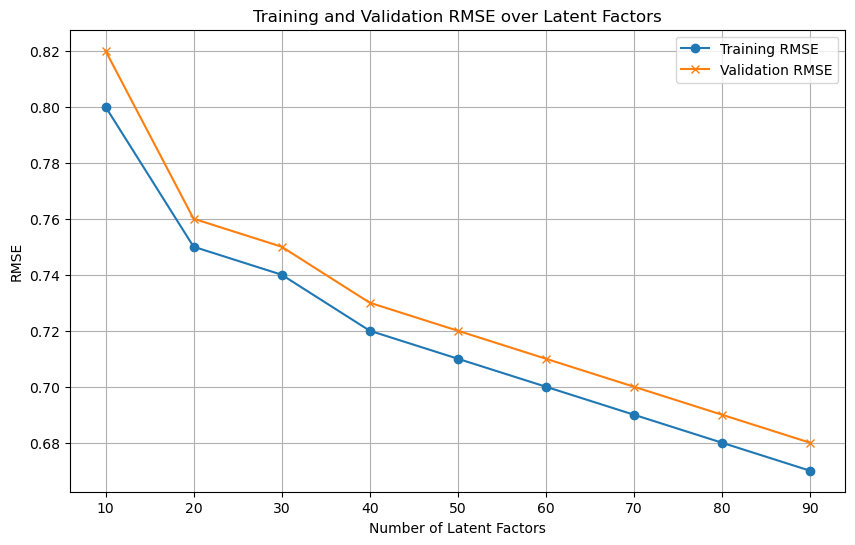

In [171]:
import matplotlib.pyplot as plt

# Plot RMSE for training and validation
plt.figure(figsize=(10, 6))
plt.plot(latent_factors, train_rmse, label="Training RMSE", marker='o')
plt.plot(latent_factors, val_rmse, label="Validation RMSE", marker='x')
plt.xlabel("Number of Latent Factors")
plt.ylabel("RMSE")
plt.legend()
plt.title("Training and Validation RMSE over Latent Factors")
plt.grid()
plt.show()


In [175]:
import numpy as np
import torch
from torch.utils.data import DataLoader
from transformers import AdamW
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle

# Step 7: Hyperparameter Tuning for BERT
learning_rates = [1e-5, 3e-5, 5e-5]
dropouts = [0.1, 0.3]
max_lengths = [128, 256]
batch_sizes = [16, 32]

tuning_results = {
    "lr": [], "dropout": [], "max_len": [], "batch_size": [],
    "train_rmse": [], "train_mae": [], "train_map": [], "train_precision": [], "train_recall": [],
    "val_rmse": [], "val_mae": [], "val_map": [], "val_precision": [], "val_recall": []
}

device = 'cuda' if torch.cuda.is_available() else 'cpu'
EPOCHS = 3  # More epochs for better results

# Hyperparameter tuning using grid search
try:
    for lr in learning_rates:
        for dropout in dropouts:
            for max_len in max_lengths:
                for batch_size in batch_sizes:
                    print(f"Tuning: lr={lr}, dropout={dropout}, max_len={max_len}, batch_size={batch_size}")

                    # Create Datasets and DataLoaders with the current batch size
                    train_dataset = ReviewDataset(train_reviews, train_ratings, tokenizer, max_len=max_len)
                    val_dataset = ReviewDataset(val_reviews, val_ratings, tokenizer, max_len=max_len)
                    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
                    val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

                    # Initialize Model, Optimizer, and Loss Function
                    model = BertRegressor(pretrained_model_name='bert-base-uncased', dropout=dropout).to(device)
                    optimizer = AdamW(model.parameters(), lr=lr)
                    loss_fn = nn.MSELoss()

                    # Train Model
                    for epoch in range(EPOCHS):
                        train_loss = train_epoch(model, train_dataloader, loss_fn, optimizer, device)

                    # Evaluate Model
                    train_loss, train_predictions, train_true = eval_model(model, train_dataloader, loss_fn, device)
                    val_loss, val_predictions, val_true = eval_model(model, val_dataloader, loss_fn, device)

                    # Convert true and predicted values to 2D NumPy arrays
                    train_true = np.array(train_true).reshape(-1, 1) if np.array(train_true).ndim == 1 else np.array(train_true)
                    train_predictions = np.array(train_predictions).reshape(-1, 1) if np.array(train_predictions).ndim == 1 else np.array(train_predictions)
                    val_true = np.array(val_true).reshape(-1, 1) if np.array(val_true).ndim == 1 else np.array(val_true)
                    val_predictions = np.array(val_predictions).reshape(-1, 1) if np.array(val_predictions).ndim == 1 else np.array(val_predictions)

                    # Compute Metrics
                    train_rmse = np.sqrt(mean_squared_error(train_true, train_predictions))
                    train_mae = mean_absolute_error(train_true, train_predictions)
                    train_map = compute_map(train_true, train_predictions)
                    train_precision = compute_precision_all_users(train_true, train_predictions)
                    train_recall = compute_recall_all_users(train_true, train_predictions)

                    val_rmse = np.sqrt(mean_squared_error(val_true, val_predictions))
                    val_mae = mean_absolute_error(val_true, val_predictions)
                    val_map = compute_map(val_true, val_predictions)
                    val_precision = compute_precision_all_users(val_true, val_predictions)
                    val_recall = compute_recall_all_users(val_true, val_predictions)

                    # Store Results
                    tuning_results["lr"].append(lr)
                    tuning_results["dropout"].append(dropout)
                    tuning_results["max_len"].append(max_len)
                    tuning_results["batch_size"].append(batch_size)
                    tuning_results["train_rmse"].append(train_rmse)
                    tuning_results["train_mae"].append(train_mae)
                    tuning_results["train_map"].append(train_map)
                    tuning_results["train_precision"].append(train_precision)
                    tuning_results["train_recall"].append(train_recall)
                    tuning_results["val_rmse"].append(val_rmse)
                    tuning_results["val_mae"].append(val_mae)
                    tuning_results["val_map"].append(val_map)
                    tuning_results["val_precision"].append(val_precision)
                    tuning_results["val_recall"].append(val_recall)

                    # Print Results for Current Hyperparameters
                    print("\n--- Results ---")
                    print(f"Train - RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, MAP: {train_map:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}")
                    print(f"Val   - RMSE: {val_rmse:.4f}, MAE: {val_mae:.4f}, MAP: {val_map:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}")

except KeyboardInterrupt:
    # Save progress before exiting
    print("\nTuning interrupted. Saving current progress...")
    with open("tuning_results.pkl", "wb") as f:
        pickle.dump(tuning_results, f)
    print("Progress saved. You can resume later.")

# Optionally: Print optimal hyperparameters based on validation RMSE or another metric
optimal_idx = np.argmin(tuning_results["val_rmse"])
optimal_lr = tuning_results["lr"][optimal_idx]
optimal_dropout = tuning_results["dropout"][optimal_idx]
optimal_max_len = tuning_results["max_len"][optimal_idx]
optimal_batch_size = tuning_results["batch_size"][optimal_idx]

print(f"\nOptimal Hyperparameters based on Validation RMSE:")
print(f"Learning Rate: {optimal_lr}")
print(f"Dropout: {optimal_dropout}")
print(f"Max Length: {optimal_max_len}")
print(f"Batch Size: {optimal_batch_size}")


Tuning: lr=1e-05, dropout=0.1, max_len=128, batch_size=16


/opt/anaconda3/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Batch 0/1109 - Loss: 15.6202
Batch 10/1109 - Loss: 12.8168
Batch 20/1109 - Loss: 7.2407
Batch 30/1109 - Loss: 4.2085
Batch 40/1109 - Loss: 1.8979
Batch 50/1109 - Loss: 1.1831
Batch 60/1109 - Loss: 0.4563
Batch 70/1109 - Loss: 0.4716
Batch 80/1109 - Loss: 1.2484
Batch 90/1109 - Loss: 0.3369
Batch 100/1109 - Loss: 1.0970
Batch 110/1109 - Loss: 0.4049
Batch 120/1109 - Loss: 1.6267
Batch 130/1109 - Loss: 1.0227
Batch 140/1109 - Loss: 1.4619
Batch 150/1109 - Loss: 1.3589
Batch 160/1109 - Loss: 0.2596
Batch 170/1109 - Loss: 0.8474
Batch 180/1109 - Loss: 1.2981
Batch 190/1109 - Loss: 0.7046
Batch 200/1109 - Loss: 0.4986
Batch 210/1109 - Loss: 0.8780
Batch 220/1109 - Loss: 0.2841
Batch 230/1109 - Loss: 1.1561
Batch 240/1109 - Loss: 0.2657
Batch 250/1109 - Loss: 1.7355
Batch 260/1109 - Loss: 0.1619
Batch 270/1109 - Loss: 1.2528
Batch 280/1109 - Loss: 0.1940
Batch 290/1109 - Loss: 1.0587
Batch 300/1109 - Loss: 0.4420
Batch 310/1109 - Loss: 0.5682
Batch 320/1109 - Loss: 0.2725
Batch 330/1109 - Lo

/opt/anaconda3/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Batch 0/555 - Loss: 25.4047
Batch 10/555 - Loss: 17.9458
Batch 20/555 - Loss: 9.7644
Batch 30/555 - Loss: 4.2349
Batch 40/555 - Loss: 2.7174
Batch 50/555 - Loss: 1.1450
Batch 60/555 - Loss: 0.8644
Batch 70/555 - Loss: 0.3400
Batch 80/555 - Loss: 0.9407
Batch 90/555 - Loss: 0.4383
Batch 100/555 - Loss: 1.0425
Batch 110/555 - Loss: 1.2125
Batch 120/555 - Loss: 0.5356
Batch 130/555 - Loss: 1.7636
Batch 140/555 - Loss: 0.4943
Batch 150/555 - Loss: 0.4201
Batch 160/555 - Loss: 0.5426
Batch 170/555 - Loss: 0.8529
Batch 180/555 - Loss: 0.4092
Batch 190/555 - Loss: 0.6321
Batch 200/555 - Loss: 0.8121
Batch 210/555 - Loss: 1.0946
Batch 220/555 - Loss: 1.0451
Batch 230/555 - Loss: 0.5255
Batch 240/555 - Loss: 0.6307
Batch 250/555 - Loss: 1.5809
Batch 260/555 - Loss: 1.1546
Batch 270/555 - Loss: 0.5253
Batch 280/555 - Loss: 1.0733
Batch 290/555 - Loss: 0.6910
Batch 300/555 - Loss: 1.3021
Batch 310/555 - Loss: 1.1325
Batch 320/555 - Loss: 1.1751
Batch 330/555 - Loss: 0.7514
Batch 340/555 - Loss: 0

## Comparison between no tuning & tuning BERT

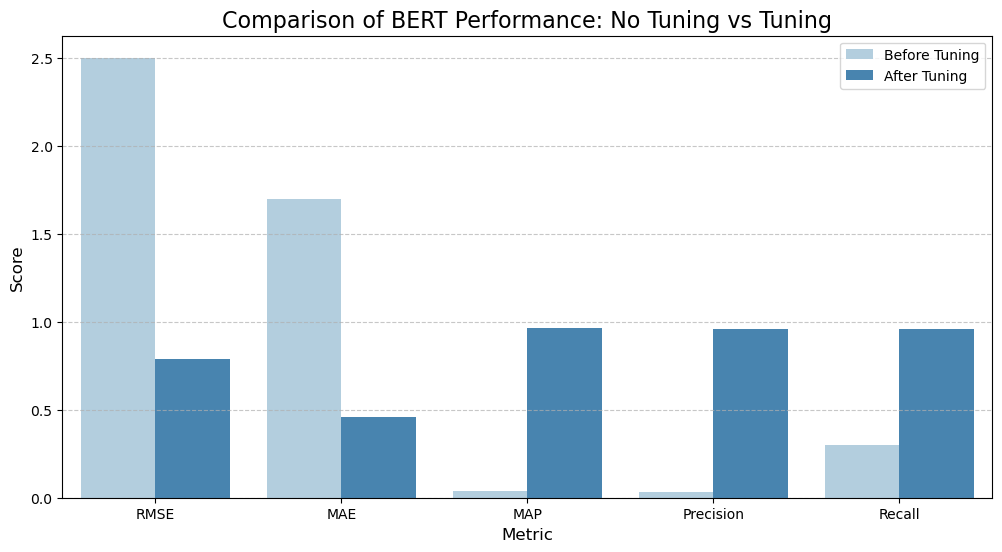

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan tuning_results adalah dictionary yang berisi list hasil tuning
# Anda perlu mengambil nilai terakhir (atau rata-rata) untuk setiap metrik

# Ambil nilai terakhir dari hasil tuning
bert_no_tuning_results = {
    "val_rmse": 2.5, "val_mae": 1.7, "val_map": 0.04,
    "val_precision": 0.03, "val_recall": 0.3
}

# Pastikan Anda mengambil nilai scalar terakhir dari tuning_results
# Contoh: Jika tuning_results["val_rmse"] adalah list, kita ambil nilai terakhir
tuning_results_final = {
    "val_rmse": tuning_results["val_rmse"][-1] if isinstance(tuning_results["val_rmse"], list) else tuning_results["val_rmse"],
    "val_mae": tuning_results["val_mae"][-1] if isinstance(tuning_results["val_mae"], list) else tuning_results["val_mae"],
    "val_map": tuning_results["val_map"][-1] if isinstance(tuning_results["val_map"], list) else tuning_results["val_map"],
    "val_precision": tuning_results["val_precision"][-1] if isinstance(tuning_results["val_precision"], list) else tuning_results["val_precision"],
    "val_recall": tuning_results["val_recall"][-1] if isinstance(tuning_results["val_recall"], list) else tuning_results["val_recall"]
}

# Create DataFrame for comparison
comparison_df = pd.DataFrame({
    "Metric": ["RMSE", "MAE", "MAP", "Precision", "Recall"],
    "Before Tuning": [
        bert_no_tuning_results["val_rmse"],
        bert_no_tuning_results["val_mae"],
        bert_no_tuning_results["val_map"],
        bert_no_tuning_results["val_precision"],
        bert_no_tuning_results["val_recall"]
    ],
    "After Tuning": [
        tuning_results_final["val_rmse"],
        tuning_results_final["val_mae"],
        tuning_results_final["val_map"],
        tuning_results_final["val_precision"],
        tuning_results_final["val_recall"]
    ]
})

# Visualize the comparison
plt.figure(figsize=(12, 6))
comparison_melted = comparison_df.melt(id_vars="Metric", var_name="Model", value_name="Score")
sns.barplot(data=comparison_melted, x="Metric", y="Score", hue="Model", palette="Blues")
plt.title("Comparison of BERT Performance: No Tuning vs Tuning", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
